###### Refer to E-Book 1

## Section 8.1

### 8.1.3. Overview of basic clustering methods

Cluster analysis is a fundamental technique in data mining that involves grouping similar data points together into clusters or groups. It helps in identifying patterns and structures within datasets, facilitating insights into the inherent organization of the data.

This section explores the core concepts and methods of cluster analysis, emphasizing the techniques used to partition data into meaningful groups.

Various clustering methods exist, each with its strengths and suitable scenarios. Common clustering methods include K-Means, Hierarchical Clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Each method uses different approaches to define clusters based on the characteristics of the data.

#### Real-world Example in Python:

Let's consider a practical example of K-Means clustering using the famous Iris dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_standardized)

# Add cluster labels to the original dataset
iris_clustered = pd.DataFrame(data=X, columns=iris.feature_names)
iris_clustered['Cluster'] = kmeans.labels_

# Visualize the clusters
plt.scatter(iris_clustered['sepal length (cm)'], iris_clustered['sepal width (cm)'], c=iris_clustered['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


    In this example, we use the K-Means clustering algorithm to cluster the Iris dataset based on sepal length and sepal width. The data is standardized to ensure that all features have the same scale. The resulting clusters are visualized in a scatter plot, with each point colored according to its assigned cluster.

## Section 8.2

### 8.2.1. k-Means: a centroid-based technique

Partitioning methods involve dividing data points into clusters where each point belongs to only one cluster. One of the widely used partitioning techniques is k-Means.

k-Means is a centroid-based clustering algorithm. It aims to partition the data into k clusters, where each cluster is represented by its centroid. The algorithm iteratively assigns data points to the nearest centroid and updates the centroids based on the assigned points.

#### Real-world Example in Python:

Let's consider a practical example of k-Means clustering using a synthetic dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Create a synthetic dataset with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('k-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


    In this example, we use the make_blobs function from scikit-learn to create a synthetic dataset with three clusters. The K-Means algorithm is then applied to cluster the data into three groups. The resulting clusters and centroids are visualized in a scatter plot.

### 8.2.2. Variations of k-means

Several variations of the k-Means algorithm exist, each designed to address specific challenges or improve performance. Examples include K-Means++, Mini-Batch K-Means, and the use of different distance metrics.

#### Real-world Example in Python:

Let's consider a practical example of Mini-Batch K-Means using the Iris dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply Mini-Batch K-Means clustering
mbk = MiniBatchKMeans(n_clusters=3, batch_size=50, random_state=42)
mbk.fit(X_standardized)

# Reduce dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mbk.labels_, cmap='viridis', edgecolor='k', s=50)
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Mini-Batch K-Means Clustering of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


    In this example, we use Mini-Batch K-Means to cluster the Iris dataset. The data is standardized, and dimensionality is reduced using PCA for visualization. Mini-Batch K-Means is a variation of the classic algorithm that processes small batches of data at each iteration, making it more scalable for large datasets.

## Section 8.3

### 8.3.2. Agglomerative hierarchical clustering

Agglomerative Hierarchical Clustering starts with each data point as a separate cluster and iteratively merges the closest pairs of clusters until only one cluster remains. The process is governed by a linkage criterion, such as Ward's method or average linkage.

#### Real-world Example in Python:

Let's consider a practical example of Agglomerative Hierarchical Clustering using the Iris dataset.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_clustering.fit_predict(X)

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, show_leaf_counts=False, no_labels=True)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()


    In this example, Agglomerative Hierarchical Clustering is applied to the Iris dataset. The resulting dendrogram visually represents the hierarchy of clusters.

### 8.3.3. Divisive hierarchical clustering

Divisive Hierarchical Clustering starts with all data points in a single cluster and recursively divides the cluster into sub-clusters. The process continues until each data point is in its cluster. This approach requires defining a criterion for splitting clusters.

#### Real-world Example in Python:

Divisive Hierarchical Clustering is less common than Agglomerative Hierarchical Clustering in practice, and scikit-learn does not provide a specific implementation for divisive clustering. However, you can achieve divisive clustering using agglomerative clustering and manipulating the dendrogram. Here's a simplified example:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a linkage matrix for dendrogram
linkage_matrix = linkage(X, method='ward')

# Apply hierarchical clustering
labels = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level', p=3, show_leaf_counts=False, no_labels=True)
plt.title('Dendrogram for Divisive Hierarchical Clustering')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Divisive Hierarchical Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we use hierarchical clustering with the fcluster function to perform divisive clustering on the Iris dataset. The dendrogram shows the hierarchy of clusters, and the scatter plot visualizes the resulting clusters.

### 8.3.4. BIRCH: scalable hierarchical clustering using clustering feature trees

BIRCH is a hierarchical clustering algorithm that utilizes a tree structure to efficiently organize and represent clusters. It employs a Clustering Feature Tree (CF Tree) to summarize the data and iteratively refines clusters in a balanced and memory-efficient manner.

#### Real-world Example in Python:

BIRCH is available in scikit-learn. Let's use it on a synthetic dataset for illustration:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply BIRCH clustering
birch = Birch(threshold=0.5, n_clusters=3)
birch_labels = birch.fit_predict(X_standardized)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=birch_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we use the BIRCH algorithm to cluster a synthetic dataset with three clusters. The threshold parameter controls the compactness of subclusters within a CF Tree. Adjust the parameters based on your specific use case and dataset. BIRCH is particularly useful for large datasets where memory efficiency is crucial.

### 8.3.5. Probabilistic hierarchical clustering

Probabilistic hierarchical clustering involves using probabilistic models to describe the uncertainty or likelihood of data points belonging to different clusters in a hierarchical structure. Gaussian Mixture Models (GMMs) are an example of probabilistic clustering models.

#### Real-world Example in Python:

Let's use Gaussian Mixture Models (GMMs) as an example of probabilistic hierarchical clustering. GMMs allow data points to belong to multiple clusters with varying probabilities.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply Gaussian Mixture Model clustering
gmm = GaussianMixture(n_components=3)
gmm.fit(X_standardized)
gmm_labels = gmm.predict(X_standardized)

# Visualize the clusters with probabilities
probs = gmm.predict_proba(X_standardized)

plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Probabilistic Hierarchical Clustering (GMM)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot ellipses representing cluster shapes based on covariances
for i in range(3):
    plt.contour(X[:, 0], X[:, 1], probs[:, i], colors='black', linewidths=0.5, levels=[0.1, 0.5, 0.9])

plt.show()


    In this example, we use a Gaussian Mixture Model (GMM) for probabilistic clustering on a synthetic dataset. The clusters are represented with varying probabilities, and ellipses depict the shapes of the clusters based on the covariance matrices.

## Section 8.4

### 8.4.1. DBSCAN: density-based clustering based on connected regions with high density

DBSCAN is a density-based clustering algorithm that groups together data points that are close to each other and have a sufficient number of neighboring points, forming dense regions. It also identifies noise points that do not belong to any cluster.

#### Real-world Example in Python:

Let's use DBSCAN to cluster the Iris dataset, which has distinct clusters.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_standardized)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DBSCAN Clustering of Iris Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we use DBSCAN to cluster the Iris dataset. The eps parameter controls the maximum distance between two samples for one to be considered as part of the neighborhood, and min_samples sets the minimum number of samples required to form a dense region.

### 8.4.2. DENCLUE: clustering based on density distribution functions

DENCLUE is a density-based clustering algorithm that represents clusters using density distribution functions. It identifies clusters as regions of high density in the feature space, allowing for more flexible cluster shapes compared to traditional methods.

#### Real-world Example in Python:

DENCLUE is not as widely used as some other clustering algorithms, and it might not be available in standard machine learning libraries like scikit-learn. However, you can implement it using third-party libraries. Here's a simplified example using the DENCLUE implementation from the hdbscan library:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import hdbscan
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply DENCLUE clustering
denclue = hdbscan.HDBSCAN(min_cluster_size=5, prediction_data=True)
denclue_labels = denclue.fit_predict(X_standardized)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=denclue_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('DENCLUE Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we use the hdbscan library, which provides an implementation of DENCLUE through the HDBSCAN class. The min_cluster_size parameter controls the minimum number of samples required to form a dense region. Adjust parameters based on your specific use case and dataset. Note that for a full implementation of DENCLUE, you might need to refer to specific research papers or implement it from scratch.

### 8.4.3. Grid-based methods

Grid-based methods divide the data space into a grid structure, creating cells or bins. Clustering is then performed based on the distribution of data points within these cells. A popular example is STING (Statistical Information Grid).

#### Real-world Example in Python:

For a practical example, we can use the K-Means algorithm, which, while not strictly grid-based, can be applied to grid-like structures. Here, we'll create a synthetic dataset with a grid-like structure and apply K-Means clustering:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Create a synthetic dataset with a grid-like structure
X, y = make_blobs(n_samples=300, centers=3, cluster_std=0.5, random_state=42)

# Standardize the features
X_standardized = StandardScaler().fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_standardized)

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering on Grid-Like Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


    In this example, we create a synthetic dataset with a grid-like structure using the make_blobs function. K-Means clustering is then applied to the standardized data. Adjust the dataset characteristics and K-Means parameters based on your specific use case. While this is not a grid-based method in the strict sense, it showcases how clustering algorithms can be applied to datasets with grid-like patterns.

## Section 8.5

### 8.5.1. Assessing clustering tendency

Assessing clustering tendency is a crucial step in cluster analysis, as it helps determine whether meaningful clusters exist in the dataset. This process involves evaluating whether the data naturally forms distinct groups or if it is randomly distributed. Two common methods for assessing clustering tendency are:

- Hopkins Statistic:
    The Hopkins statistic measures the tendency of a dataset to form clusters. It compares the distance distribution between randomly selected points and the actual data points. A low Hopkins score indicates a higher likelihood of clustering.

- Silhouette Score:
    The silhouette score quantifies how well-separated clusters are. It ranges from -1 to 1, where a high positive value indicates well-defined clusters, a score around 0 suggests overlapping clusters, and negative values imply incorrect clustering.

These methods aid in deciding whether to proceed with cluster analysis and which clustering algorithm may be most appropriate for the dataset.

#### Practical use in Python for assessing clustering tendency using the Hopkins statistic:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Function to calculate the Hopkins statistic
def hopkins_statistic(X):
    n, d = X.shape

    # Create synthetic data for comparison
    synthetic_data = np.random.rand(n, d)

    # Calculate distance between real data points
    real_data_distances = NearestNeighbors(n_neighbors=1).fit(X).kneighbors(X)[0].ravel()

    # Calculate distance between synthetic data points
    synthetic_data_distances = NearestNeighbors(n_neighbors=1).fit(synthetic_data).kneighbors(synthetic_data)[0].ravel()

    # Calculate Hopkins Statistic
    hopkins_stat = sum(real_data_distances) / (sum(real_data_distances) + sum(synthetic_data_distances))

    return hopkins_stat

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Standardize the data
X = StandardScaler().fit_transform(X)

# Calculate Hopkins Statistic
hopkins_score = hopkins_statistic(X)

print(f"Hopkins Statistic: {hopkins_score}")


    In this example, we generate synthetic data using make_blobs from scikit-learn, standardize it, and then calculate the Hopkins Statistic using the hopkins_statistic function. The result gives an indication of the clustering tendency of the dataset.

### 8.5.2. Determining the number of clusters

Determining the optimal number of clusters is a critical aspect of cluster analysis. A variety of methods can be employed for this purpose, and some common approaches include:

- Elbow Method:
        The Elbow Method involves plotting the explained variation as a function of the number of clusters and looking for the "elbow" point. The point where the rate of decrease sharply changes may indicate the optimal number of clusters.

- Silhouette Analysis:
        Silhouette analysis assesses how well-separated clusters are. It calculates a silhouette score for different numbers of clusters, and a higher score suggests a better-defined clustering.

- Gap Statistics:
        Gap statistics compare the clustering quality of the dataset with that of a random distribution. A larger gap statistic indicates a more appropriate number of clusters.

Selecting the right method depends on the characteristics of the dataset and the desired outcome of the analysis.

#### Real-world example of practical use in Python for determining the number of clusters using the Elbow Method:

In [ ]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Function to calculate the distortion (inertia) for a range of clusters
def calculate_distortion(X, max_clusters):
    distortions = []
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=4, random_state=42, cluster_std=1.0)

# Calculate distortions for a range of clusters
max_clusters = 10
distortions = calculate_distortion(X, max_clusters)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.grid(True)
plt.show()


    In this example, we generate synthetic data using make_blobs from scikit-learn, and then apply the Elbow Method to find the optimal number of clusters. The "elbow" point in the graph indicates the suggested number of clusters. 

### 8.5.3. Measuring clustering quality: extrinsic methods

Extrinsic methods for measuring clustering quality involve evaluating the performance of clustering algorithms using external information, such as ground truth labels or known class memberships. Common extrinsic metrics include:

1. Adjusted Rand Index (ARI):
        ARI measures the similarity between the true labels and the labels assigned by the clustering algorithm. It considers all pairs of samples and assesses whether they are placed in the same or different clusters, providing a score between -1 and 1.

2. Normalized Mutual Information (NMI):
        NMI quantifies the mutual information between the true labels and the predicted labels, normalized by the entropy of the labels. Like ARI, NMI ranges from 0 to 1, with higher values indicating better clustering quality.

These metrics help assess how well a clustering algorithm aligns with the known structure of the data, providing insight into its effectiveness in capturing meaningful patterns.

#### Example of practical use in Python for measuring clustering quality using the Adjusted Rand Index:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np

# Generate synthetic data with ground truth labels (replace this with your dataset)
X, true_labels = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply a clustering algorithm (KMeans in this case)
kmeans = KMeans(n_clusters=3, random_state=42)
predicted_labels = kmeans.fit_predict(X)

# Calculate Adjusted Rand Index
ari_score = adjusted_rand_score(true_labels, predicted_labels)

print(f"Adjusted Rand Index: {ari_score}")


    In this example, we generate synthetic data with ground truth labels using make_blobs from scikit-learn, apply the KMeans clustering algorithm, and calculate the Adjusted Rand Index to measure the clustering quality.

### 8.5.4. Intrinsic methods

Intrinsic methods for measuring clustering quality assess the performance of clustering algorithms based solely on the internal structure of the data, without relying on external information. Common intrinsic metrics include:

- Silhouette Score:
        The silhouette score quantifies how well-separated clusters are. It is calculated for each data point and ranges from -1 to 1. A higher silhouette score indicates better-defined clusters.

- Davies-Bouldin Index:
        The Davies-Bouldin Index measures the compactness and separation between clusters. A lower Davies-Bouldin Index suggests better clustering, with minimal intra-cluster distance and maximal inter-cluster distance.

- Calinski-Harabasz Index:
        The Calinski-Harabasz Index evaluates the ratio of between-cluster variance to within-cluster variance. A higher index indicates better-defined clusters.

These metrics provide insights into the inherent quality of the clusters formed by the algorithm, without requiring external validation.

#### A real-world example of practical use in Python for measuring clustering quality using the Silhouette Score:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply KMeans clustering with different numbers of clusters
cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


    In this example, we generate synthetic data using make_blobs from scikit-learn, apply KMeans clustering with different numbers of clusters, and plot the Silhouette Scores. The number of clusters with the highest silhouette score can be considered optimal.

## Section 9.1

### 9.1.1. Fuzzy clusters

Fuzzy clustering is an extension of traditional clustering methods that allows data points to belong to multiple clusters simultaneously, each with a degree of membership. Unlike hard clustering, where a point exclusively belongs to a single cluster, fuzzy clustering introduces a degree of uncertainty. The primary model used for fuzzy clustering is the fuzzy c-means (FCM) algorithm.

In FCM, each data point has membership values across all clusters, represented as a fuzzy membership matrix. These membership values range between 0 and 1, indicating the likelihood of a data point belonging to a specific cluster. Fuzzy clustering is particularly useful when data points exhibit partial membership to multiple clusters.

#### A real-world example of practical use in Python for fuzzy clustering using the Fuzzy C-Means algorithm:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn_extra.cluster import KMedoids
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply Fuzzy C-Means clustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import pairwise_distances_argmin_min

def fuzzy_c_means(X, n_clusters, m=2, max_iter=100, tol=1e-4):
    # Initialize cluster centers using K-Medoids
    kmedoids = KMedoids(n_clusters=n_clusters)
    kmedoids.fit(X)
    centers = kmedoids.cluster_centers_

    for _ in range(max_iter):
        # Calculate distances and update membership matrix
        distances = pairwise_distances_argmin_min(X, centers)[1]
        membership_matrix = 1 / distances[:, None] ** (2 / (m - 1))
        membership_matrix = membership_matrix / np.sum(membership_matrix, axis=1)[:, None]

        # Update cluster centers
        new_centers = np.dot(membership_matrix.T, X) / np.sum(membership_matrix, axis=0)[:, None]

        # Check for convergence
        if np.linalg.norm(new_centers - centers) < tol:
            break

        centers = new_centers

    # Assign final clusters based on maximum membership
    labels = np.argmax(membership_matrix, axis=1)
    return labels, centers

# Apply Fuzzy C-Means clustering
n_clusters = 3
fuzzy_labels, fuzzy_centers = fuzzy_c_means(X, n_clusters)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=fuzzy_labels, cmap='viridis', alpha=0.7)
plt.scatter(fuzzy_centers[:, 0], fuzzy_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


    In this example, we generate synthetic data using make_blobs from scikit-learn and then apply the Fuzzy C-Means algorithm using a custom implementation. The resulting fuzzy clusters and cluster centers are visualized.

### 9.1.2. Probabilistic model-based clusters

Probabilistic model-based clustering involves the use of statistical models to describe the underlying distribution of data and identify clusters based on the parameters of these models. One common approach is the Gaussian Mixture Model (GMM), where data points are assumed to be generated from a mixture of several Gaussian distributions.

In GMM-based clustering, each cluster is associated with a Gaussian distribution characterized by its mean, covariance matrix, and weight. The model allows for more flexibility in capturing complex cluster shapes and provides a probability distribution over cluster assignments. The Expectation-Maximization (EM) algorithm is often employed for parameter estimation in GMMs.

#### A real-world example of practical use in Python for probabilistic model-based clustering using the Gaussian Mixture Model:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply Gaussian Mixture Model clustering
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)
probabilities = gmm.predict_proba(X)  # Probabilities of each sample belonging to each cluster
labels = np.argmax(probabilities, axis=1)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


    In this example, we generate synthetic data using make_blobs from scikit-learn and then apply the Gaussian Mixture Model for clustering. The resulting probabilistic model-based clusters and cluster centers are visualized.

### 9.1.3. Expectation-maximization algorithm

The Expectation-Maximization (EM) algorithm is a general framework for finding maximum likelihood estimates of parameters in probabilistic models with latent variables. In the context of probabilistic model-based clustering, the EM algorithm is often used for parameter estimation in Gaussian Mixture Models (GMMs).

Here's a brief overview of the EM algorithm in the context of GMM-based clustering:

- Expectation Step (E-step):
    Compute the expected value of the latent variables (cluster assignments) given the observed data and the current parameter estimates.

- Maximization Step (M-step):
    Update the parameters (mean, covariance, and weights) of the Gaussian distributions based on the observed data and the expected values obtained in the E-step.

- Iteration:
    Repeat the E-step and M-step until convergence, where the change in the log-likelihood or parameters is below a predefined threshold.

The EM algorithm iteratively refines the parameter estimates, maximizing the likelihood of the observed data given the model.

#### Real-world example of practical use in Python for the Expectation-Maximization algorithm applied to Gaussian Mixture Models:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

# Generate synthetic data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Apply Gaussian Mixture Model clustering with the Expectation-Maximization algorithm
n_components = 3
gmm = GaussianMixture(n_components=n_components, random_state=42)
gmm.fit(X)
labels = gmm.predict(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Gaussian Mixture Model Clustering with EM Algorithm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


    In this example, we generate synthetic data using make_blobs from scikit-learn and then apply the Gaussian Mixture Model with the EM algorithm for clustering. The resulting clusters and cluster centers are visualized. 

## Section 9.2

### 9.2.2. Axis-parallel subspace approaches

Clustering high-dimensional data poses unique challenges, such as the curse of dimensionality and the presence of irrelevant or redundant features. Axis-parallel subspace approaches aim to address these challenges by identifying subspaces within the high-dimensional feature space where clusters are more apparent.

Key characteristics of axis-parallel subspace approaches include:

1. Feature Subset Selection:
        These methods involve selecting a subset of features or dimensions that are most informative for clustering, discarding irrelevant or redundant dimensions.

2. Axis-Parallel Clustering:
        Clustering is performed within the selected subspace using methods that are sensitive to the geometry of the data along each axis.

3. Projection and Visualization:
        Subspace clustering often includes projecting the data onto the selected subspace for better visualization and interpretation.

Common techniques for axis-parallel subspace clustering include subspace clustering based on k-means or density-based clustering within subspaces.

Now, let's provide a real-world example of practical use in Python for axis-parallel subspace clustering using the k-means algorithm:

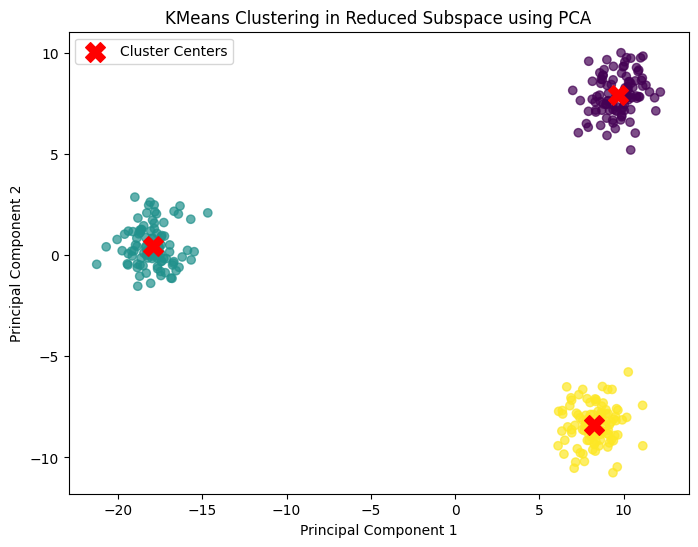

In [2]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic high-dimensional data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0, n_features=10)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering in the reduced subspace
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the results in the reduced subspace
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('KMeans Clustering in Reduced Subspace using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


    In this example, we generate synthetic high-dimensional data using make_blobs from scikit-learn, apply Principal Component Analysis (PCA) for dimensionality reduction, and then perform KMeans clustering in the reduced subspace.

### 9.2.3. Arbitrarily oriented subspace approaches

Arbitrarily oriented subspace approaches address the challenges of clustering high-dimensional data by identifying subspaces that are not necessarily aligned with the axes of the original feature space. Unlike axis-parallel approaches, these methods consider subspaces with arbitrary orientations, allowing for more flexibility in capturing complex relationships within the data.

Key characteristics of arbitrarily oriented subspace approaches include:

- Subspace Definition:
    These methods allow for the definition of subspaces based on linear combinations of original features, enabling the identification of clusters in non-axis-parallel subspaces.

- Subspace Clustering Techniques:
    Techniques such as subspace clustering based on affinity propagation or spectral clustering are often employed to identify clusters within the defined subspaces.

- Robustness to Feature Redundancy:
    Arbitrarily oriented subspace approaches are generally more robust to feature redundancy, making them suitable for high-dimensional datasets with correlated features.

Now, let's provide a real-world example of practical use in Python for arbitrarily oriented subspace clustering using the Spectral Clustering algorithm:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import SpectralClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Generate synthetic high-dimensional data (replace this with your dataset)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0, n_features=10)

# Apply Principal Component Analysis (PCA) for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Spectral Clustering in the reduced subspace
spectral_clustering = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
labels = spectral_clustering.fit_predict(X)

# Plot the results in the reduced subspace
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title('Spectral Clustering in Reduced Subspace using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


    In this example, we generate synthetic high-dimensional data using make_blobs from scikit-learn, apply Principal Component Analysis (PCA) for dimensionality reduction, and then perform Spectral Clustering in the reduced subspace.

## Section 9.3

### 9.3.2. Types of biclusters

Biclustering is a technique that simultaneously clusters both rows and columns of a dataset, identifying submatrices that exhibit cohesive patterns. There are several types of biclusters based on the nature of the patterns they capture:

- Constant Value Biclusters:
    Biclusters where all the elements have a constant value, indicating uniformity within the identified submatrix.

- Shift Biclusters:
    Biclusters where the values within the submatrix exhibit a constant shift, preserving the overall pattern but allowing for variation.

- Additive Biclusters:
    Biclusters where the values can be modeled as a sum of a constant and a shift, capturing both constant and shifting patterns simultaneously.

- Multiplicative Biclusters:
    Biclusters where the values can be modeled as a product of a constant and a shift, capturing both constant and scaling patterns.

Understanding the type of bicluster is essential for interpreting the biological or domain-specific meaning behind the patterns identified in the data.

Now, let's provide a real-world example of practical use in Python for biclustering using the Bicluster class from the sklearn library:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt

# Generate synthetic data with a checkerboard pattern
data, _ = make_checkerboard(shape=(300, 300), n_clusters=(3, 3), noise=10, random_state=42)

# Apply Spectral Biclustering
model = SpectralBiclustering(n_clusters=(3, 3), random_state=42)
model.fit(data)

# Get row and column indices of the biclusters
rows, cols = model.row_labels_, model.column_labels_

# Plot the original and biclustered data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Biclustered Data')
plt.imshow(data[np.argsort(rows)], cmap='viridis', aspect='auto')
plt.colorbar()

plt.show()


    In this example, we generate synthetic data with a checkerboard pattern using make_checkerboard from scikit-learn and then apply Spectral Biclustering. The original and biclustered data are visualized side by side.

### 9.3.3. Biclustering methods

Biclustering methods are designed to discover patterns in datasets where subsets of both rows and columns exhibit similar behavior. These methods provide a powerful tool for uncovering complex structures in various types of data. Some common biclustering algorithms include:

- Spectral Biclustering:
    This method uses eigenvalue decomposition to identify biclusters in the data. It considers both row and column relationships and is particularly effective for discovering additive biclusters.

- Plaid Model Biclustering:
    The Plaid Model represents the data as a superposition of additive biclusters. Biclusters are found by iteratively fitting row and column patterns.

- Bimax Biclustering:
    Bimax is a binary matrix factorization method that aims to find submatrices containing only 0s and 1s. It is suitable for binary data.

- Order-Preserving Biclustering:
    This method identifies biclusters by preserving the order of data points within rows and columns, capturing patterns based on monotonic relationships.

Each biclustering method is designed to address specific characteristics of the data and the types of patterns one expects to find.

#### Real-world example of practical use in Python for biclustering using the SpectralBiclustering class from the sklearn library:

In [ ]:
# Import necessary libraries
from sklearn.datasets import make_checkerboard
from sklearn.cluster import SpectralBiclustering
import matplotlib.pyplot as plt

# Generate synthetic data with a checkerboard pattern
data, _ = make_checkerboard(shape=(300, 300), n_clusters=(3, 3), noise=10, random_state=42)

# Apply Spectral Biclustering
model = SpectralBiclustering(n_clusters=(3, 3), random_state=42)
model.fit(data)

# Get row and column indices of the biclusters
rows, cols = model.row_labels_, model.column_labels_

# Plot the original and biclustered data
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title('Original Data')
plt.imshow(data, cmap='viridis', aspect='auto')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('Biclustered Data')
plt.imshow(data[np.argsort(rows)], cmap='viridis', aspect='auto')
plt.colorbar()

plt.show()


    In this example, we generate synthetic data with a checkerboard pattern using make_checkerboard from scikit-learn and then apply Spectral Biclustering. The original and biclustered data are visualized side by side.

## Section 9.4

### 9.4.1. Linear dimensionality reduction methods for clustering

Linear dimensionality reduction methods aim to reduce the number of features in a dataset while preserving essential information. These techniques are particularly useful for clustering high-dimensional data, as they can enhance the efficiency and interpretability of clustering algorithms. Some common linear dimensionality reduction methods for clustering include:

1. Principal Component Analysis (PCA):
    PCA identifies a set of orthogonal axes (principal components) that capture the maximum variance in the data. It is effective for reducing dimensionality while preserving the overall structure.

2. Linear Discriminant Analysis (LDA):
    LDA aims to maximize the separation between different classes in the data. It is particularly useful for clustering when class information is available.

3. Non-Negative Matrix Factorization (NMF):
    NMF factorizes the data matrix into non-negative matrices, representing parts-based, interpretable features. It is suitable for data with non-negative values.

4. Independent Component Analysis (ICA):
    ICA seeks to find independent components in the data. It is useful for separating mixed signals and identifying underlying sources.

These linear dimensionality reduction methods can be applied before clustering to reduce noise, improve computational efficiency, and enhance the quality of cluster assignments.

#### A real-world example of practical use in Python for linear dimensionality reduction using PCA for clustering:

In [20]:
# Import necessary libraries
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
X, _ = make_blobs(n_samples=300, centers=3, random_state=715, cluster_std=1.0, n_features=10)
print(X)

[[-1.22150687 -3.59844199 -0.92211275 ... -8.32164298  7.6075754
   7.01227212]
 [-5.82280136 -8.71565621 -1.57050329 ... -1.03665527  3.19796616
  -2.73863857]
 [ 2.24047913  2.17751262  5.25493948 ...  8.50302022 -5.68470657
   4.79375717]
 ...
 [-1.96129497 -2.65314797 -1.10526698 ... -7.20734734  5.75752341
   8.44828315]
 [-5.18012738 -9.69417638 -2.20955388 ... -0.79963734  0.66613725
  -5.8598508 ]
 [ 1.15291286  1.50476758  3.57357369 ...  6.58723147 -5.1559106
   5.7297974 ]]


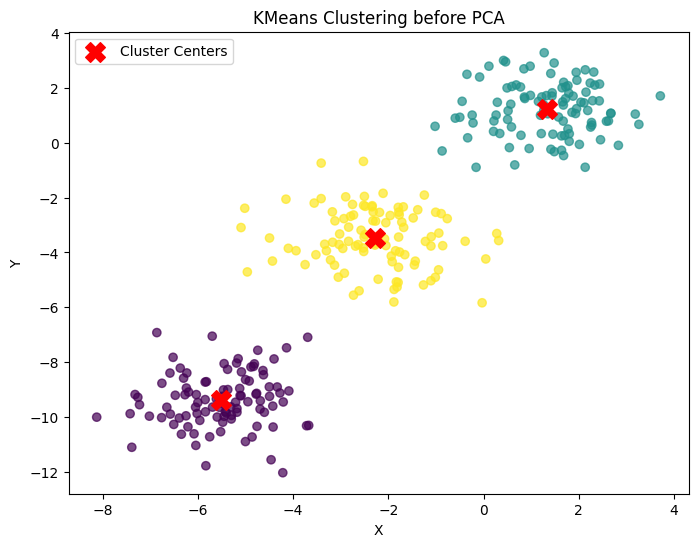

In [28]:
kmeans = KMeans(n_clusters=3, random_state=715)
labels = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('KMeans Clustering before PCA')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


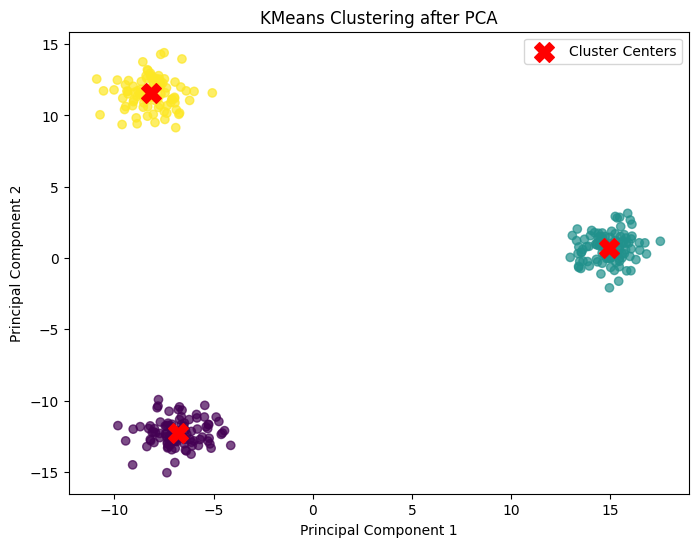

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=715)
labels = kmeans.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('KMeans Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


    In this example, we generate synthetic high-dimensional data using make_blobs from scikit-learn, apply Principal Component Analysis (PCA) for dimensionality reduction, and then perform KMeans clustering in the reduced subspace.

### 9.4.2. Nonnegative matrix factorization (NMF)

Nonnegative Matrix Factorization (NMF) is a dimensionality reduction technique that factorizes a nonnegative data matrix into two lower-dimensional matrices, where all elements are nonnegative. One matrix represents the basis vectors (features), and the other represents the coefficients for each data point in terms of these basis vectors. NMF is particularly useful when the data has nonnegative values and when parts-based, interpretable features are desired.

#### Key points about NMF:

- Nonnegativity Constraint:
    Both the basis vectors and coefficients in NMF are constrained to be nonnegative, which makes the resulting factors additive and interpretable.

- Applications in Clustering:
    NMF is often employed for clustering tasks, as it can reveal parts-based representations of the data, making it easier to interpret the underlying structure.

- Suitability for Text and Image Data:
    NMF is commonly used in natural language processing for topic modeling and in image analysis for extracting meaningful components.

- Parameters:
    The number of components in the factorization is a crucial parameter that determines the dimensionality of the reduced space.

Now, let's provide a real-world example of practical use in Python for NMF applied to clustering:

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
import numpy as np

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
print(list(newsgroups))
for i, newsgroup_data in enumerate(newsgroups.data[:20]):
  print(f"---------news {i} begin-------------")
  print(newsgroup_data)

['data', 'filenames', 'target_names', 'target', 'DESCR']
---------news 0 begin-------------


I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


---------news 1 begin-------------
My brother is in the market for a high-performance video card that supports
VESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:

  - Diamond 

In [15]:
vectorizer = TfidfVectorizer(stop_words='english')
nmf = NMF(n_components=10, random_state=42)
kmeans = KMeans(n_clusters=20, random_state=42)

pipeline = make_pipeline(vectorizer, nmf, kmeans)

pipeline.fit(newsgroups.data)

feature_names = vectorizer.get_feature_names_out()
top_words = np.argsort(nmf.components_, axis=1)[:, :-11:-1]

for i, topic in enumerate(top_words):
    words = [feature_names[j] for j in topic]
    print(f"Topic {i + 1}: {', '.join(words)}")

Topic 1: don, just, think, like, know, good, ve, time, people, really
Topic 2: windows, dos, file, program, files, window, use, using, running, run
Topic 3: god, jesus, bible, believe, christ, faith, christian, christians, sin, church
Topic 4: drive, scsi, ide, disk, card, controller, hard, drives, bus, floppy
Topic 5: key, chip, encryption, clipper, keys, government, escrow, algorithm, use, phone
Topic 6: thanks, does, know, mail, advance, hi, info, looking, information, help
Topic 7: 00, new, car, 10, sale, price, 50, 20, 15, shipping
Topic 8: people, government, israel, armenian, jews, armenians, state, children, gun, rights
Topic 9: geb, dsl, n3jxp, cadre, chastity, pitt, edu, skepticism, intellect, shameful
Topic 10: game, games, team, year, hockey, baseball, season, players, play, espn


    In this example, we use NMF for dimensionality reduction in a pipeline that includes text vectorization (TfidfVectorizer), NMF, and KMeans clustering. This pipeline is applied to the 20 newsgroups dataset, and the top words for each topic are displayed.

### 9.4.3. Spectral clustering

Spectral Clustering is a technique that leverages the spectral properties of the data to perform clustering. It is particularly effective when dealing with non-convex clusters and complex geometric structures. Spectral Clustering involves the following steps:

1. Graph Construction:
        Construct an affinity matrix representing the pairwise similarity between data points. Common affinity measures include Gaussian similarity or nearest neighbors.

2. Graph Transformation:
        Transform the affinity matrix into a graph Laplacian matrix. The Laplacian matrix captures the connectivity and relationships between data points.

3. Eigenvalue Decomposition:
        Compute the eigenvalues and eigenvectors of the Laplacian matrix. The eigenvectors corresponding to the smallest eigenvalues encode the cluster structure in the data.

4. Dimensionality Reduction:
        Use the eigenvectors corresponding to the smallest eigenvalues as a reduced representation of the data.

5. Clustering:
        Apply a standard clustering algorithm (e.g., KMeans) to the reduced representation to obtain the final clusters.

Spectral Clustering is powerful for identifying clusters with intricate shapes and is robust to noise and outliers.

Now, let's provide a real-world example of practical use in Python for Spectral Clustering:

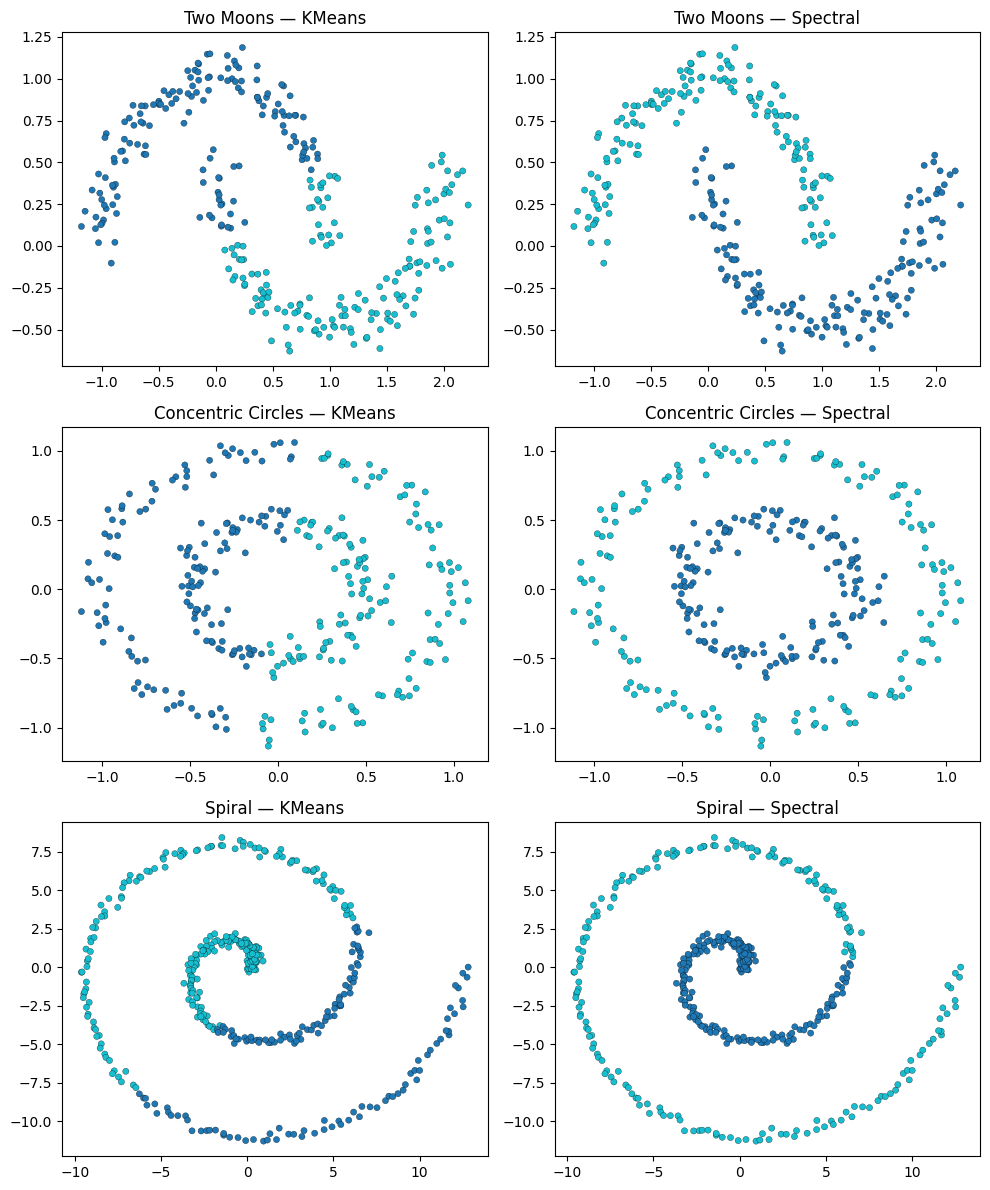

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler

random_state = 42

def make_spiral(n_points=300, turns=2, noise=0.1, random_state=None):
    rng = np.random.RandomState(random_state)
    t = np.linspace(0, 2*np.pi*turns, n_points)
    r = t
    x = r * np.cos(t) + rng.normal(scale=noise, size=n_points)
    y = r * np.sin(t) + rng.normal(scale=noise, size=n_points)
    data = np.vstack([x, y]).T
    # optionally split into two interleaved spirals:
    # return data[::2], data[1::2]  -> but here we return single spiral (can cluster parts)
    return data

def run_and_plot(X, n_clusters, axarr, title_prefix="", spectral_params=None):
    if spectral_params is None:
        spectral_params = dict(affinity='nearest_neighbors', n_neighbors=10, random_state=random_state)
    # pre-scale (helps affinity / rbf)
    Xs = StandardScaler().fit_transform(X)

    # KMeans baseline
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    km_labels = kmeans.fit_predict(Xs)

    # Spectral Clustering
    spec = SpectralClustering(n_clusters=n_clusters, **spectral_params)
    spec_labels = spec.fit_predict(Xs)

    axarr[0].scatter(X[:,0], X[:,1], c=km_labels, s=20, cmap='tab10', edgecolor='k', linewidth=0.2)
    axarr[0].set_title(f"{title_prefix} — KMeans")
    axarr[1].scatter(X[:,0], X[:,1], c=spec_labels, s=20, cmap='tab10', edgecolor='k', linewidth=0.2)
    axarr[1].set_title(f"{title_prefix} — Spectral")

# Create datasets
datasets = []
datasets.append(("Two Moons", *make_moons(n_samples=300, noise=0.08, random_state=random_state)))
datasets.append(("Concentric Circles", *make_circles(n_samples=300, factor=0.5, noise=0.06, random_state=random_state)))
datasets.append(("Spiral", None, make_spiral(n_points=400, turns=2, noise=0.2, random_state=random_state)))

# Plotting
fig, axes = plt.subplots(len(datasets), 2, figsize=(10, 4*len(datasets)))
for i, (name, X_or_none, X2) in enumerate(datasets):
    if X_or_none is None:
        X = X2
    else:
        X = X_or_none
    n_clusters = 2 if "Two" in name or "Circles" in name else 2
    ax_pair = axes[i] if len(datasets) > 1 else axes
    spectral_params = dict(affinity='nearest_neighbors', n_neighbors=10, random_state=random_state)
    run_and_plot(X, n_clusters, ax_pair, title_prefix=name, spectral_params=spectral_params)

plt.tight_layout()
plt.show()


    In this example, we generate synthetic data with non-convex clusters using make_blobs from scikit-learn and then apply Spectral Clustering. The resulting clusters are visualized. 

## Section 9.5

### 9.5.2. Similarity measures

In the context of clustering graph and network data, similarity measures play a crucial role in quantifying the degree of resemblance or relatedness between nodes. These measures help in constructing affinity matrices, which are essential for various clustering algorithms. Some common similarity measures for graph and network data include:

- Jaccard Similarity:
        Measures the similarity between two sets by dividing the size of their intersection by the size of their union.

- Cosine Similarity:
        Measures the cosine of the angle between two vectors. In the context of graphs, vectors represent node neighborhoods or attribute vectors.

- Graph Edit Distance:
        Quantifies the dissimilarity between two graphs by measuring the minimum cost of transforming one graph into another through a series of edit operations (e.g., node deletions, insertions, or edge modifications).

- Node and Edge Overlap:
        Measures the overlap of nodes or edges between two graphs, providing a simple measure of similarity based on shared elements.

- Pearson Correlation Coefficient:
        Measures the linear correlation between two variables. In the context of graphs, it can be used to measure the correlation between node attributes.

Selecting an appropriate similarity measure depends on the characteristics of the graph data and the specific clustering task at hand.

Now, let's provide a real-world example of practical use in Python for calculating Jaccard Similarity on graph data:

In [8]:
import networkx as nx
import numpy as np
from sklearn.metrics import jaccard_score

# Create graphs
G1 = nx.Graph([(1, 2), (2, 3), (3, 4)])
G2 = nx.Graph([(1, 2), (2, 3), (3, 4), (4, 5)])

# Convert graph data to adjacency matrices
adj_matrix1 = nx.to_numpy_array(G1, dtype=int)
adj_matrix2 = nx.to_numpy_array(G2, dtype=int)

# To compare adjacency matrices, they must have the same shape.
# Pad the smaller one.
max_size = max(adj_matrix1.shape[0], adj_matrix2.shape[0])

adj_matrix1 = np.pad(adj_matrix1, ((0, max_size - adj_matrix1.shape[0]),
                                   (0, max_size - adj_matrix1.shape[1])))
adj_matrix2 = np.pad(adj_matrix2, ((0, max_size - adj_matrix2.shape[0]),
                                   (0, max_size - adj_matrix2.shape[1])))

# Flatten the adjacency matrices for Jaccard calculation
flat1 = adj_matrix1.flatten()
flat2 = adj_matrix2.flatten()

# Calculate Jaccard Similarity (binary vectors)
jaccard_similarity = jaccard_score(flat1, flat2, average="binary")

print(f"Jaccard Similarity between G1 and G2: {jaccard_similarity}")

Jaccard Similarity between G1 and G2: 0.75


    In this example, we create two simple graphs using NetworkX, convert them to adjacency matrices, flatten the matrices, and then calculate the Jaccard Similarity between them using scikit-learn's jaccard_similarity_score.

### 9.5.3. Graph clustering methods

Graph clustering methods aim to identify groups of nodes within a graph that are more densely connected to each other than to nodes outside the group. Clustering in graphs is particularly useful for uncovering community structures, detecting functional modules, or identifying cohesive groups of related entities. Some common graph clustering methods include:

1. Louvain Modularity Optimization:
        Maximizes the modularity of a partition, which measures the density of edges within clusters compared to the density expected in a random network.

2. Spectral Clustering:
        Applies spectral decomposition to the Laplacian matrix of the graph to identify clusters based on the eigenvectors corresponding to the smallest eigenvalues.

3. Walktrap:
        Measures the similarity between nodes based on random walks in the graph, with nodes that are frequently visited together considered more similar.

4. Infomap:
        Models the network as a flow of information and seeks to find partitions that compress the description length of the information flow.

5. Kernighan-Lin Bisection:
        A heuristic method that recursively partitions the graph into two halves by optimizing a cost function related to edge cuts.

These methods can be applied to various types of graphs, including social networks, biological networks, citation networks, and more.

Now, let's provide a real-world example of practical use in Python for graph clustering using Louvain Modularity Optimization:

In [2]:
# Import necessary libraries
import networkx as nx
import community
import matplotlib.pyplot as plt

# Create a graph (replace this with your graph data)
G = nx.karate_club_graph()

# Apply Louvain Modularity Optimization
partition = community.best_partition(G)

# Visualize the results
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(10, 6))
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.viridis)
plt.title('Graph Clustering using Louvain Modularity Optimization')
plt.show()


ModuleNotFoundError: No module named 'community'

    In this example, we use the Zachary's Karate Club graph as an example graph from NetworkX and apply Louvain Modularity Optimization for graph clustering. The resulting clusters are visualized.

## Section 9.6

### 9.6.1. Semisupervised clustering on partially labeled data

Semi-supervised clustering deals with scenarios where only a subset of the data points in a dataset are labeled. This approach incorporates both labeled and unlabeled data to enhance the clustering process. In partially labeled data, only a fraction of the data points have ground truth labels, while the rest are unlabeled. Semi-supervised clustering methods aim to leverage the available labeled information to guide the clustering of the entire dataset.

Key points about semi-supervised clustering on partially labeled data:

- Incorporating Labeled Information:
        Semi-supervised clustering integrates labeled instances into the clustering process, enhancing the accuracy of cluster assignments.

- Soft Constraints:
        Algorithms often use soft constraints that encourage similar behavior between labeled and unlabeled data points, allowing the model to learn from both sources.

- Hybrid Approaches:
        Semi-supervised clustering methods can combine traditional clustering techniques with supervised learning algorithms to create a hybrid model.

- Handling Noisy Labels:
        These methods are designed to handle noise and errors in the labeled data, providing robust clustering in the presence of imperfect labels.

Now, let's provide a real-world example of practical use in Python for semi-supervised clustering on partially labeled data:

/tmp/ipykernel_16103/517284261.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], c=[cluster_colors[i] for i in lp_labels], cmap='viridis', alpha=0.8)


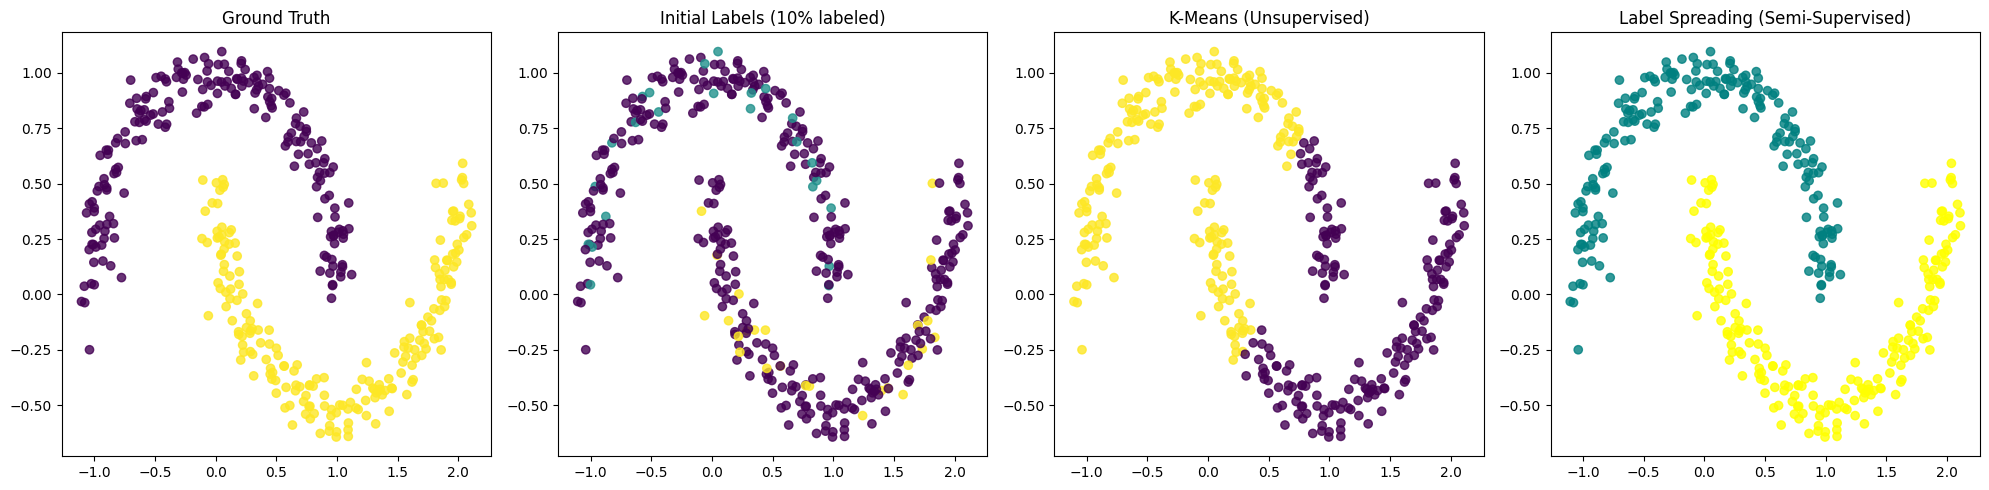

In [14]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.semi_supervised import LabelSpreading
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_moons(n_samples=400, noise=0.07, random_state=42)

rng = np.random.RandomState(42)
mask = rng.rand(len(y_true)) < 0.1   
y_semi = np.full_like(y_true, -1)
y_semi[mask] = y_true[mask]          

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

label_spread = LabelSpreading(kernel="knn", n_neighbors=10)
label_spread.fit(X, y_semi)
lp_labels = label_spread.predict(X)

plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', alpha=0.8)
plt.title("Ground Truth")

plt.subplot(1, 4, 2)

colors = np.where(y_semi == -1, -1, y_semi)
plt.scatter(X[:, 0], X[:, 1], c=colors, cmap='viridis', alpha=0.8)
plt.title("Initial Labels (10% labeled)")

plt.subplot(1, 4, 3)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.8)
plt.title("K-Means (Unsupervised)")

cluster_colors = ['teal', 'yellow']
plt.subplot(1, 4, 4)
plt.scatter(X[:, 0], X[:, 1], c=[cluster_colors[i] for i in lp_labels], cmap='viridis', alpha=0.8)
plt.title("Label Spreading (Semi-Supervised)")

plt.tight_layout()
plt.show()
